In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%pip install sympy 
from sympy import *

In [ ]:
df_b = pd.read_csv('data/BBRs_5538500_5538999.csv')


In [2]:
df_p = pd.read_csv('data/PPDs_5538500_5540000.csv')
df_p

,slot,block_hash,block_reward,gas_used,validator_pubkey,operator_name,pool_name,buidler_pubkey,builder_name,relay_name,relay_url
0,5538500,0x9655d36ce0e876eea03fde593d875e3fed71bf138af6...,0.159454,13732781,0x92b4ed3d1682d2586e68878d6d0629e555d29eb766ed...,NaN,NaN,0x82ba7cadcdfc1b156ba2c48c1c627428ba917858e62c...,Unknown,Flashbots,https://0xac6e77dfe25ecd6110b8e780608cce0dab71...
1,5538501,0x383dca1fb965bcb19f92932782e0efbbe3f8d8bc15b8...,0.056432,14759390,0x98226d1be207533941452ecf37d09adaf234bf4d3163...,NaN,Coinbase,0xa1daf0ab37a9a204bc5925717f78a795fa2812f8fba8...,Ø gethgo1.19.1 linux,Flashbots,https://0xac6e77dfe25ecd6110b8e780608cce0dab71...
2,5538502,0x37159c71a33375586597bd896392ceb6317bd385a97a...,0.136855,15351496,0x81509611e5b714536d85ee906bc9d06a8461c8c3dd61...,Stakefish,NaN,0xaec4ec48c2ec03c418c599622980184e926f0de3c9ce...,beaverbuild.org,Bloxroute Regulated,https://0xb0b07cd0abef743db4260b0ed50619cf6ad4...
3,5538503,0x5342aabc7ac2ab398139d4989ef4ff57938d30536ff7...,0.023790,14418555,0xb474cb46ea2bae46ee9e658683662db5f365ec8ddcac...,NaN,Bitfinex,0x81babeec8c9f2bb9c329fd8a3b176032fe0ab5f3b92a...,flashbots,Flashbots,https://0xac6e77dfe25ecd6110b8e780608cce0dab71...
4,5538504,0x498f3ec769d9be888b4f9f23a453a1579442de210abe...,0.052001,18232404,0xa6b6364d808331a54fd3ec24f7b0ac2d1e43e884e523...,NaN,NaN,0x81beef03aafd3dd33ffd7deb337407142c80fea2690e...,flashbots,Flashbots,https://0xac6e77dfe25ecd6110b8e780608cce0dab71...
...,...,...,...,...,...,...,...,...,...,...,...
1368,5539995,0xe40fa3e78963d61fb42f6e341911f92dfd73b3544663...,0.034382,11904764,0x8acfb26ffe42d89c1a536c1eaf756858e38447ff680b...,NaN,NaN,0x81beef03aafd3dd33ffd7deb337407142c80fea2690e...,flashbots,Flashbots,https://0xac6e77dfe25ecd6110b8e780608cce0dab71...
1369,5539996,0x790a324e2793e8ea44ec3629d3d5a3faa9ef1b8dc5be...,0.229077,15792512,0xa59bcaaa071bdbdbb7e64201e7383efc150515036c56...,NaN,Kraken,0xa4fb63c2ceeee73d1f1711fadf1c5357ac98cecb999d...,builder0x69,Flashbots,https://0xac6e77dfe25ecd6110b8e780608cce0dab71...
1370,5539998,0xb2577d212891dd3da5b21a58e40c40a3b8e43967a4ba...,0.071430,17799874,0xb143f8647d8fe34e82537c243fe9670fa91257b6c4ca...,NaN,NaN,0x94aa4ee318f39b56547a253700917982f4b737a49fc3...,bloxroute,Bloxroute Max Profit,https://0x8b5d2e73e2a3a55c6c87b8b6eb92e0149a12...
1371,5539999,0x8d86751ae37b5750a1481171cb386202b612396eef2e...,0.039707,12504193,0xaa080e8c227f979b139633bd7a874a6497656042a034...,NaN,Kraken,0x83bee51799e65130296f5d60ce7d78119578db6045c3...,Unknown,Flashbots,https://0xac6e77dfe25ecd6110b8e780608cce0dab71...


In [3]:
df_p.drop_duplicates(subset=['slot'], keep='first', inplace=True)

In [4]:
df_p.sort_values(by=['slot'], ascending=True, inplace=True)
df_p.rename(columns={'buidler_pubkey': 'builder_pubkey'}, inplace=True)


In [5]:
df_p = df_p[['slot', 'block_hash', 'block_reward', 'gas_used', 'validator_pubkey', 'builder_pubkey', 'builder_name', 'relay_name']]


In [20]:
slot = np.arange(5538500,5540000)
df = pd.DataFrame(slot, columns = ['slot'])

In [21]:
df = df.merge(df_p, how='left', on='slot')
df

,slot,block_hash,block_reward,gas_used,validator_pubkey,builder_pubkey,builder_name,relay_name
0,5538500,0x9655d36ce0e876eea03fde593d875e3fed71bf138af6...,0.159454,13732781.0,0x92b4ed3d1682d2586e68878d6d0629e555d29eb766ed...,0x82ba7cadcdfc1b156ba2c48c1c627428ba917858e62c...,Unknown,Flashbots
1,5538501,0x383dca1fb965bcb19f92932782e0efbbe3f8d8bc15b8...,0.056432,14759390.0,0x98226d1be207533941452ecf37d09adaf234bf4d3163...,0xa1daf0ab37a9a204bc5925717f78a795fa2812f8fba8...,Ø gethgo1.19.1 linux,Flashbots
2,5538502,0x37159c71a33375586597bd896392ceb6317bd385a97a...,0.136855,15351496.0,0x81509611e5b714536d85ee906bc9d06a8461c8c3dd61...,0xaec4ec48c2ec03c418c599622980184e926f0de3c9ce...,beaverbuild.org,Bloxroute Regulated
3,5538503,0x5342aabc7ac2ab398139d4989ef4ff57938d30536ff7...,0.023790,14418555.0,0xb474cb46ea2bae46ee9e658683662db5f365ec8ddcac...,0x81babeec8c9f2bb9c329fd8a3b176032fe0ab5f3b92a...,flashbots,Flashbots
4,5538504,0x498f3ec769d9be888b4f9f23a453a1579442de210abe...,0.052001,18232404.0,0xa6b6364d808331a54fd3ec24f7b0ac2d1e43e884e523...,0x81beef03aafd3dd33ffd7deb337407142c80fea2690e...,flashbots,Flashbots
...,...,...,...,...,...,...,...,...
1495,5539995,0xe40fa3e78963d61fb42f6e341911f92dfd73b3544663...,0.034382,11904764.0,0x8acfb26ffe42d89c1a536c1eaf756858e38447ff680b...,0x81beef03aafd3dd33ffd7deb337407142c80fea2690e...,flashbots,Flashbots
1496,5539996,0x790a324e2793e8ea44ec3629d3d5a3faa9ef1b8dc5be...,0.229077,15792512.0,0xa59bcaaa071bdbdbb7e64201e7383efc150515036c56...,0xa4fb63c2ceeee73d1f1711fadf1c5357ac98cecb999d...,builder0x69,Flashbots
1497,5539997,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1498,5539998,0xb2577d212891dd3da5b21a58e40c40a3b8e43967a4ba...,0.071430,17799874.0,0xb143f8647d8fe34e82537c243fe9670fa91257b6c4ca...,0x94aa4ee318f39b56547a253700917982f4b737a49fc3...,bloxroute,Bloxroute Max Profit


In [33]:
df['count'] = 1
df['position'] = 0
count = 0
for i in range(0, len(df)):
    #check = df['builder_pubkey'].iloc[i] == df['builder_pubkey'].iloc[i-1] 
    check = (df['builder_name'].iloc[i] == df['builder_name'].iloc[i-1]) & (df['builder_name'].iloc[i] != 'Unknown')
    
    if check == True:
        if count == 0:
            count = 2
        else:
            count += 1

    elif (check == False) & (count == 0):
            continue

    elif (check == False) & (count != 0):
        for j in range(1, count+1):
            df['count'].iloc[i-j] = count
            df['position'].iloc[i-j] = count+1-j

        count = 0
        
        

/var/folders/1l/dlmzk3fn30g9wwk6y58j36c00000gn/T/ipykernel_33225/238692698.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count'].iloc[i-j] = count
/var/folders/1l/dlmzk3fn30g9wwk6y58j36c00000gn/T/ipykernel_33225/238692698.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['position'].iloc[i-j] = count+1-j


In [23]:
df['block_reward'].fillna((df[df['count'] == 1]['block_reward'].mean()), inplace=True)

/var/folders/1l/dlmzk3fn30g9wwk6y58j36c00000gn/T/ipykernel_33225/3337591959.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2f}'.format(x)+' ETH' for x in vals])


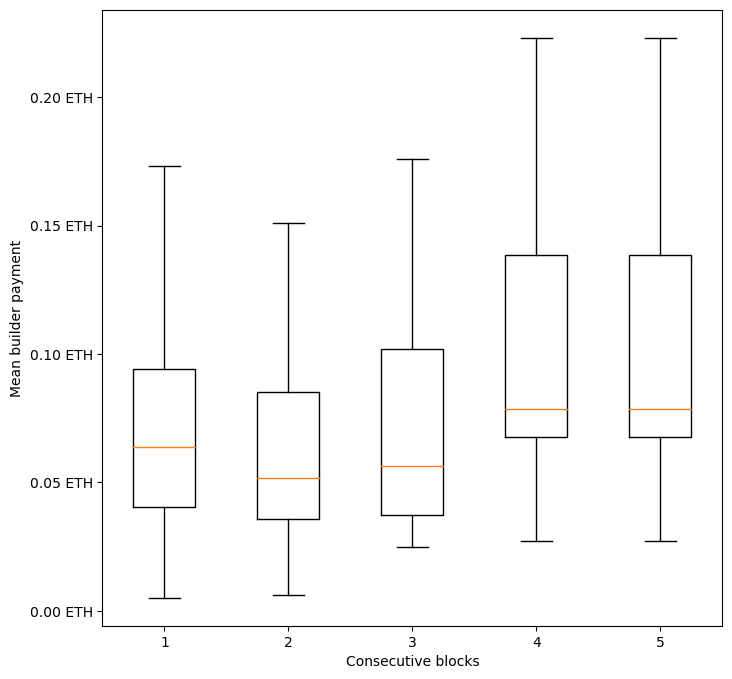

In [37]:
data_1 = list(df[df['count']==1]['block_reward'])
data_2 = list(df[df['count']==2]['block_reward'])
data_3 = list(df[df['count']==3]['block_reward'])
data_4 = list(df[df['count']==4]['block_reward'])
data_5 = list(df[df['count']==4]['block_reward'])
data = [data_1, data_2, data_3, data_4, data_5]
 
fig, ax = plt.subplots(figsize =(8, 8))

ax.boxplot(data, showfliers=False)

ax.set_ylabel('Mean builder payment')
ax.set_xlabel('Consecutive blocks')

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2f}'.format(x)+' ETH' for x in vals])

# show plot
plt.show()


In [42]:
stat = df.groupby(df['count']).size().values
stat[1] = stat[1]/2
stat[2] = stat[2]/3
stat[3] = stat[3]/4
stat[4] = stat[4]/5

print('In a dataset of', len(df), 'blocks (5h), we find:')
print(stat[0], 'single blocks')
print(stat[1], 'instances of 2 consecutive blocks')
print(stat[2], 'instances of 3 consecutive blocks')
print(stat[3], 'instances of 4 consecutive blocks')
print(stat[4], 'instances of 5 consecutive blocks')
print('proposed by the same builder')

In a dataset of 1500 blocks (5h), we find:
1120 single blocks
133 instances of 2 consecutive blocks
28 instances of 3 consecutive blocks
5 instances of 4 consecutive blocks
2 instances of 5 consecutive blocks
proposed by the same builder


In [43]:
df[df['count'] >3].head(50)

,slot,block_hash,block_reward,gas_used,validator_pubkey,builder_pubkey,builder_name,relay_name,count,position
300,5538800,0xef2be8773865dc02f1bc6c41d30f737928e965a397e5...,0.222576,29996606.0,0xb0fb6e9496d09538b2d6277be2965546977d18e89d7b...,0x81babeec8c9f2bb9c329fd8a3b176032fe0ab5f3b92a...,flashbots,Flashbots,4,1
301,5538801,0x5da394d4bc0e95b94e032f7b1bf5a751da8517d2b887...,0.103966,18073019.0,0xb19387f922a85870ece8cfc31a9c6df7d49b73d1adc4...,0x81beef03aafd3dd33ffd7deb337407142c80fea2690e...,flashbots,Flashbots,4,2
302,5538802,0x1ea43f62d7d3f2bb2df43c8728e3484966dbd3712cf5...,0.068160,13811707.0,0xb341310ba2a779d57487cbd846f09404805eebeecce9...,0x81babeec8c9f2bb9c329fd8a3b176032fe0ab5f3b92a...,flashbots,Flashbots,4,3
303,5538803,0x6d50300331286836ae030e245ab9eeccec9e3cfd5a9c...,0.110602,14279438.0,0xa39f5a301d87dbcac06a7a2f764e3846f94935d66224...,0x81beef03aafd3dd33ffd7deb337407142c80fea2690e...,flashbots,Flashbots,4,4
370,5538870,0x2598aa477acdf4764dc1ae944e73f564c076a828dbd2...,0.223122,14318351.0,0x8a4cb6d7e9da273b71911e9c3ee29bdb0dabae5a14cb...,0x96a59d355b1f65e270b29981dd113625732539e955a1...,beaverbuild.org,Flashbots,4,1
371,5538871,0x64a555d5a14278b85d01b2e0490b82366459135ac434...,0.148527,15852529.0,0xa137ae3c6f2bc8af675b3f619d39dbdc4a6d0ed4adfe...,0x96a59d355b1f65e270b29981dd113625732539e955a1...,beaverbuild.org,Ultra Sound Relay,4,2
372,5538872,0xcd3e8a588962e395152604c56e61585c767f1e1f4b4e...,0.192357,18242439.0,0xb1702b889743379de1bb77cdb8122d6cd580f8d927fc...,0x96a59d355b1f65e270b29981dd113625732539e955a1...,beaverbuild.org,Flashbots,4,3
373,5538873,0x90de56ba9000f737ae44c6d7a4528505c73dcb9b7b56...,0.068141,12779201.0,0x93386f53907e9d7c774c6529a807f56aaeccf3da0d36...,0x96a59d355b1f65e270b29981dd113625732539e955a1...,beaverbuild.org,Flashbots,4,4
478,5538978,0x9dcf83a88536f2543745e221ea842587f5fbceaac308...,0.027230,10535152.0,0x887d166f67f5a171ace3b81bd96546fbf3481b1d7391...,0x8dde59a0d40b9a77b901fc40bee1116acf643b2b6065...,beaverbuild.org,Ultra Sound Relay,4,1
479,5538979,0x5579605992584a1839ffa081dcb0bd7655dfe89286b5...,0.103550,15310605.0,0x8a27b8fd63fcba38c3d9692a1dee1ef10b1c5ddaa0a0...,0xaec4ec48c2ec03c418c599622980184e926f0de3c9ce...,beaverbuild.org,Flashbots,4,2


/var/folders/1l/dlmzk3fn30g9wwk6y58j36c00000gn/T/ipykernel_33225/1839615896.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2f}'.format(x)+' ETH' for x in vals])


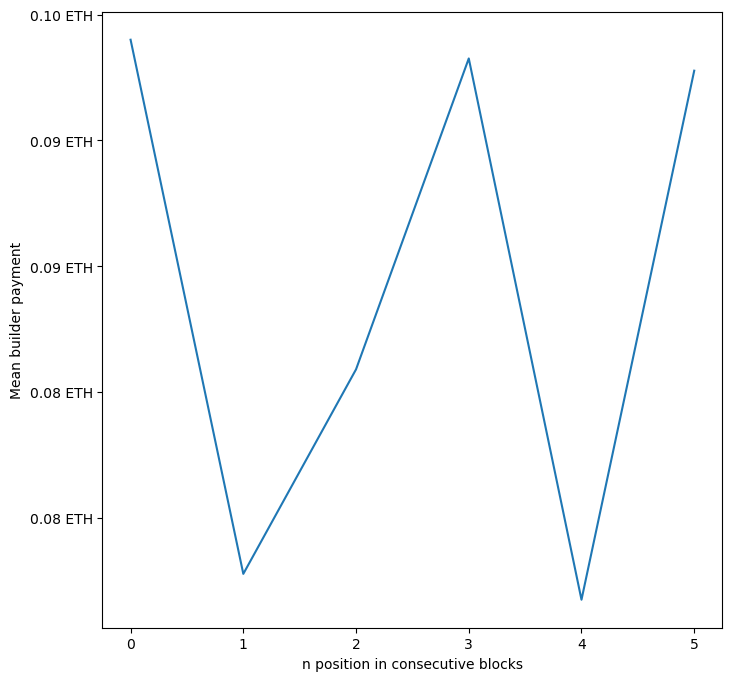

In [48]:
fig, ax = plt.subplots(figsize =(8, 8))


ax.plot(df['position'].unique(), df['block_reward'].groupby(df['position']).mean())

ax.set_ylabel('Mean builder payment')
ax.set_xlabel('n position in consecutive blocks')

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2f}'.format(x)+' ETH' for x in vals])

# show plot
plt.show()


In [70]:
def prob(r, p):
    # r = consecutive blocks
    # n = slots
    # p = share MEV boost
    
    x = symbols('x', real=True)

    r = r; n = 32; p = p

    xx = min(i for i in solve(1-x+(1-p)*p**r*x**(r+1)) if i > 1)
    qn = ((1 - p*xx) / ((r + 1 - r*xx)*(1-p))) * (1/(xx**(n+1)))

    print('Probability of no success:', qn*100, '%') 
    print('Probability of success:', (1-qn)*100, '%')

In [78]:
cons_blocks = np.arange(2,10+1)
p = np.arange(.5,.9+.05,.05)

prob(cons_blocks[0],p[0])

Probability of no success: 0.132780685089529 %
Probability of success: 99.8672193149105 %


In [79]:
p

array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 ])